In [135]:
def clear_vars(): 
    %reset -f
clear_vars()
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from sympy import *
init_printing()

# R1, R2, R3, R4, R5, C1, C2, s = symbols('R1 R2 R3 R4 R5 C1 C2 s')

# subs = {
#     R1: 3,
#     R2: 3,
#     R3: 3,
#     R4: 3,
#     R5: 3,
#     C1: 3,
#     C2: 3
# }

# 1

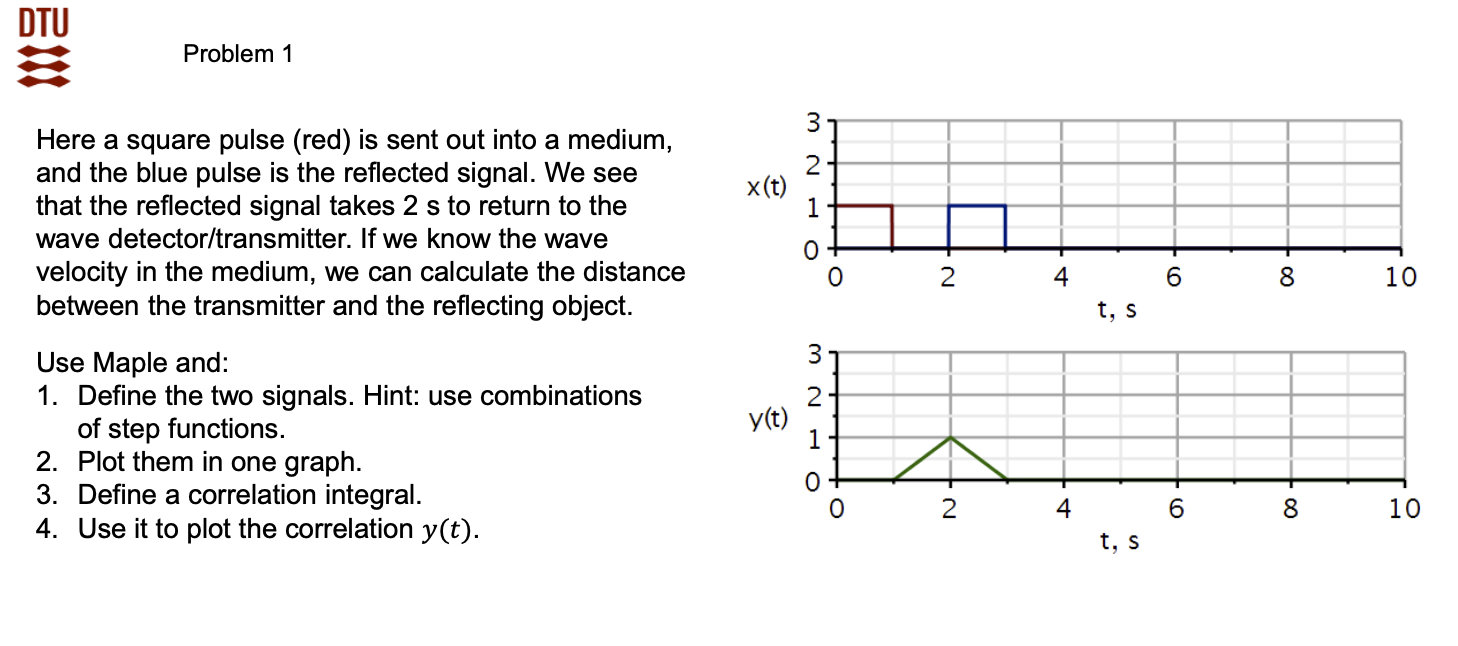

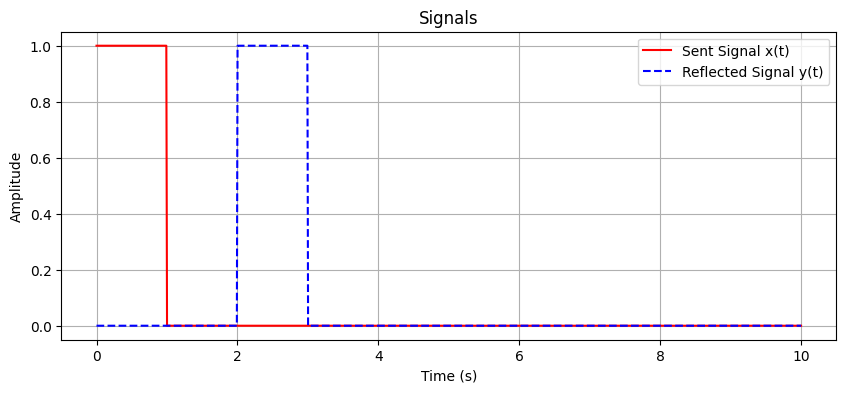

In [136]:
t = np.linspace(0, 10, 1000)  # Fine grid for better resolution

# Define step function
def step(t):
    return np.heaviside(t, 1)

# Define signals
x1 = step(t) - step(t - 1)  # Original pulse at t = 0 to t = 1
x2 = step(t - 2) - step(t - 3)  # Reflected pulse at t = 2 to t = 3

# Plot both signals
plt.figure(figsize=(10, 4))
plt.plot(t, x1, label="Sent Signal x(t)", color='red')
plt.plot(t, x2, label="Reflected Signal y(t)", color='blue', linestyle="dashed")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Signals")
plt.legend()
plt.grid()
plt.show()

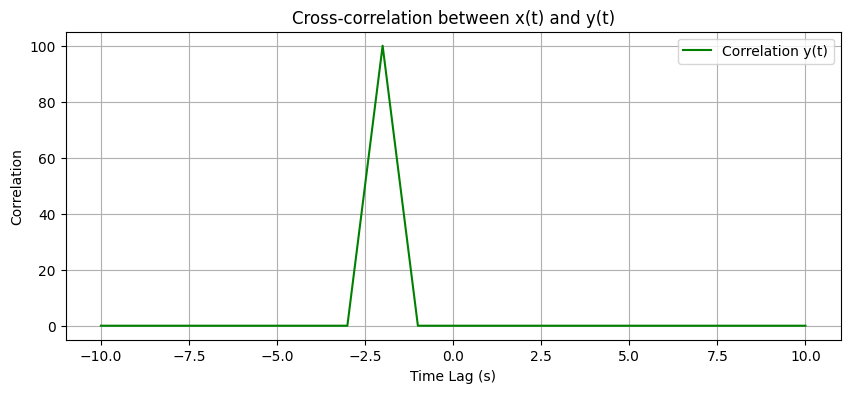

In [137]:
# Compute correlation
y = signal.correlate(x1, x2, mode='full') # Cross-correlation
lags = np.linspace(-10, 10, len(y))  # Generate lags for plotting

# Plot correlation
plt.figure(figsize=(10, 4))
plt.plot(lags, y, label="Correlation y(t)", color='green')
plt.xlabel("Time Lag (s)")
plt.ylabel("Correlation")
plt.title("Cross-correlation between x(t) and y(t)")
plt.legend()
plt.grid()
plt.show()

# 2

In [138]:
def clear_vars(): 
    %reset -f
clear_vars()
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from sympy import *
init_printing()

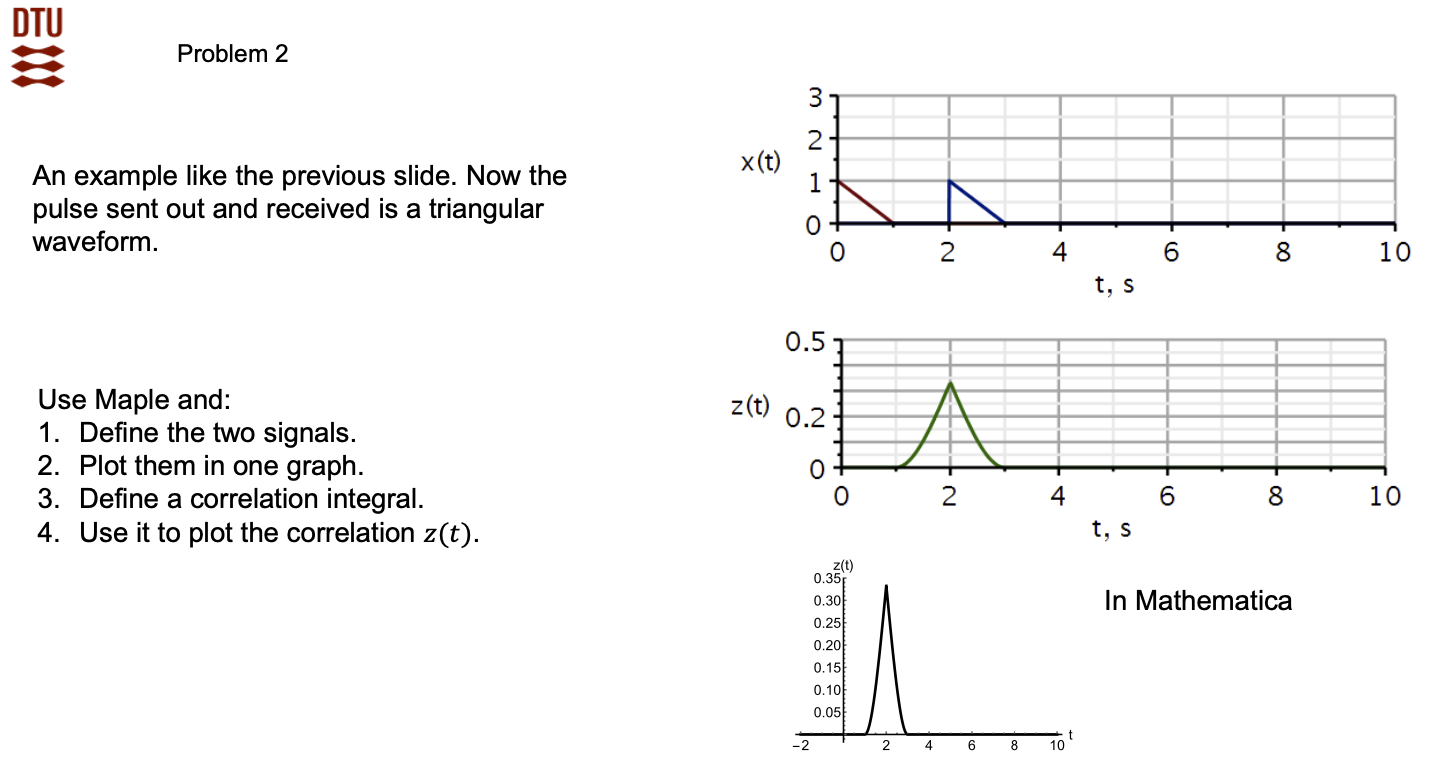

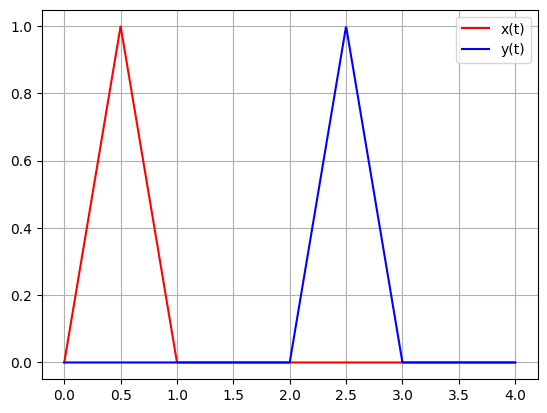

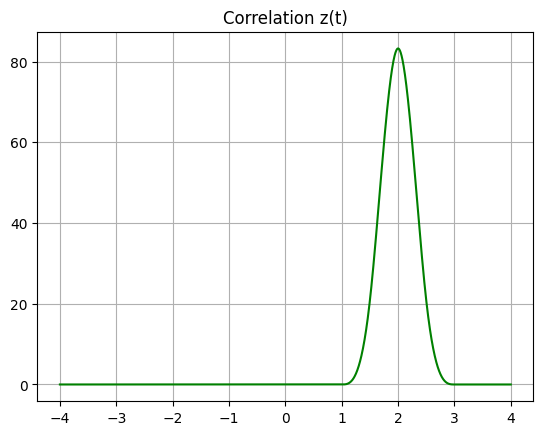

In [139]:
t = np.linspace(0, 4, 1000)

# Triangular pulse: rises to 1 at t=0.5, falls to 0 at t=1
def triangle(t):
    return np.maximum(1 - 2 * np.abs(t - 0.5), 0)

# Signals
x = triangle(t)                          # Sent pulse from t = 0 to 1
y = triangle(t - 2)                      # Reflected pulse delayed by 2s

# Plot signals
plt.plot(t, x, label='x(t)', color='red')
plt.plot(t, y, label='y(t)', color='blue')
plt.legend(); plt.grid(); plt.show()

# Correlation
corr = signal.correlate(y, x, mode='full') # reverse order of x and y to get correlation on the positive side
dt = t[1] - t[0]  # time step size
lags = np.arange(-len(x)+1, len(x)) * dt

# Plot correlation
plt.plot(lags, corr, color='green')
plt.title("Correlation z(t)")
plt.grid(); plt.show()

# 3

In [140]:
def clear_vars(): 
    %reset -f
clear_vars()
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.integrate import quad
from sympy import *
init_printing()

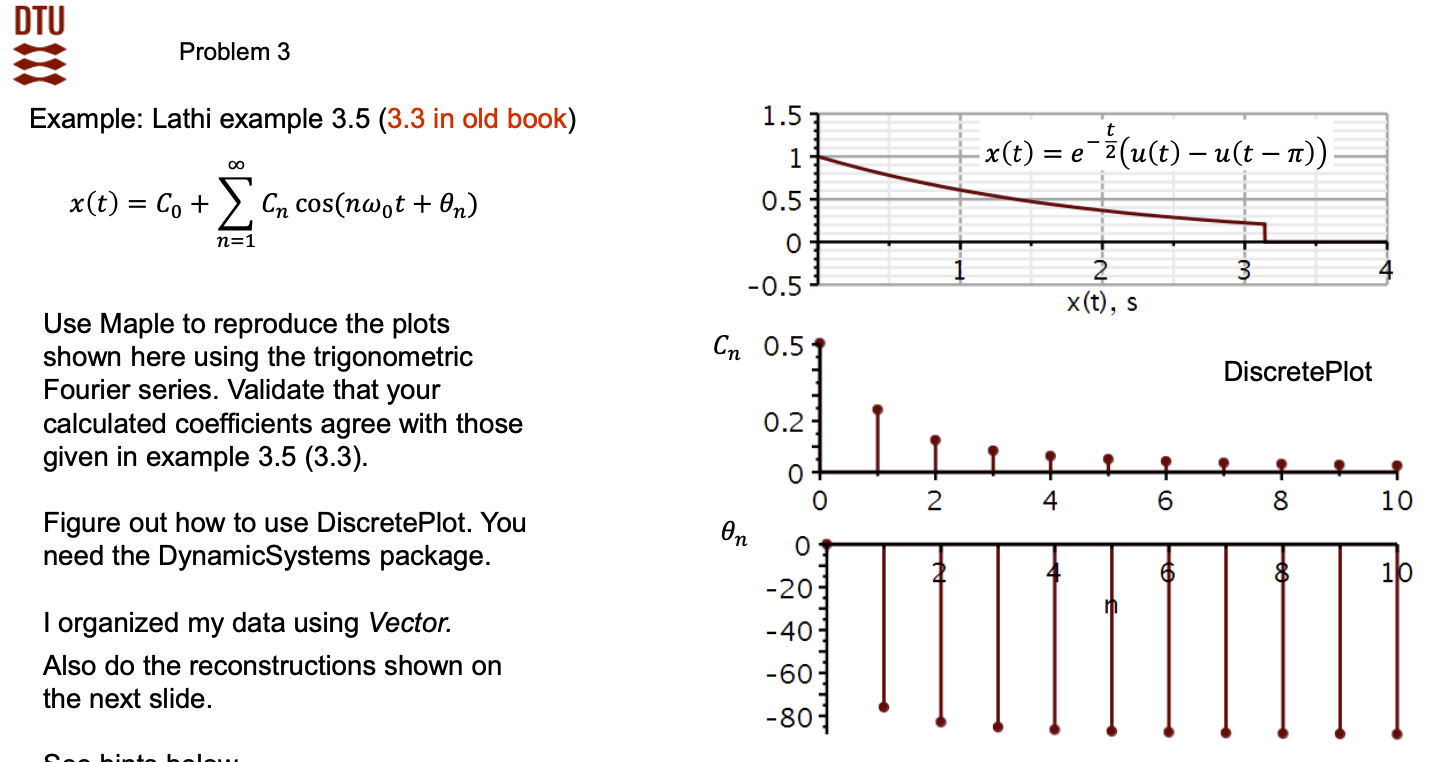

In [ ]:
# TODO : not sure if this is correct

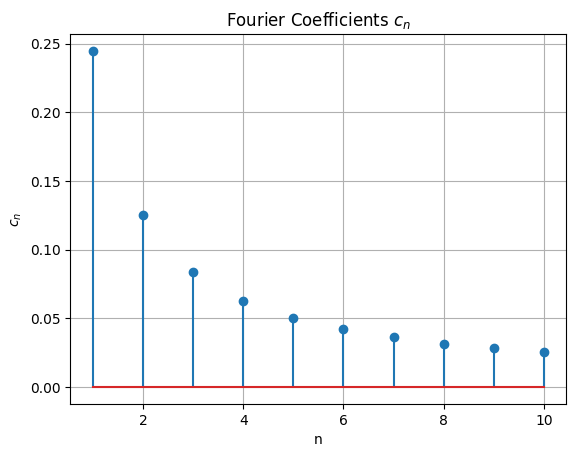

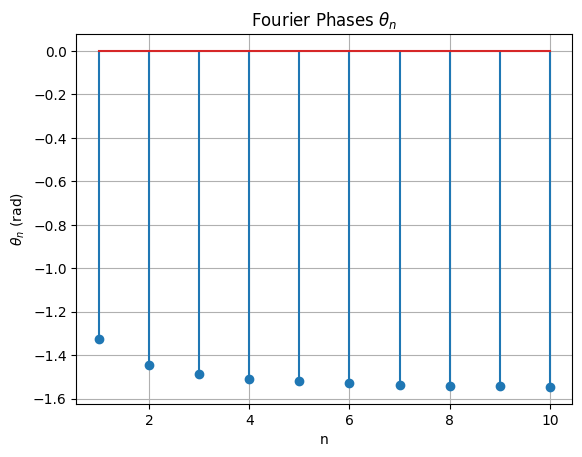

In [ ]:
# T = 2*np.pi
# w0 = 2*np.pi / T  # = 1
T = np.pi
w0 = 2*np.pi / T  # => 2
N = 10  # Number of harmonics
t = np.linspace(0, 2*np.pi, 1000)

# Original signal
x = lambda t: np.exp(-t/2) * ((t >= 0) & (t <= np.pi))

# Compute cn and thetan
cn = []
thetan = []


for n in range(1, N+1):
    # a_n = (2/T) * quad(lambda t: np.exp(-t/2) * np.cos(n * w0 * t), 0, np.pi)[0]
    # b_n = (2/T) * quad(lambda t: np.exp(-t/2) * np.sin(n * w0 * t), 0, np.pi)[0]
    a_n = (2/T)*quad(lambda t: np.exp(-t/2)*np.cos(n*w0*t), 0, T, epsabs=1e-12, epsrel=1e-12)[0]
    b_n = (2/T)*quad(lambda t: np.exp(-t/2)*np.sin(n*w0*t), 0, T, epsabs=1e-12, epsrel=1e-12)[0]
    c_n = np.sqrt(a_n**2 + b_n**2)
    theta_n = -np.arctan2(b_n, a_n)  # Note minus for consistency
    cn.append(c_n)
    thetan.append(theta_n)
    

# Plot cn
plt.stem(range(1, N+1), cn)
plt.title("Fourier Coefficients $c_n$")
plt.xlabel("n")
plt.ylabel("$c_n$")
plt.grid()
plt.show()

# Plot thetan
plt.stem(range(1, N+1), thetan)
plt.title("Fourier Phases $\\theta_n$")
plt.xlabel("n")
plt.ylabel("$\\theta_n$ (rad)")
plt.grid()
plt.show()

# 4

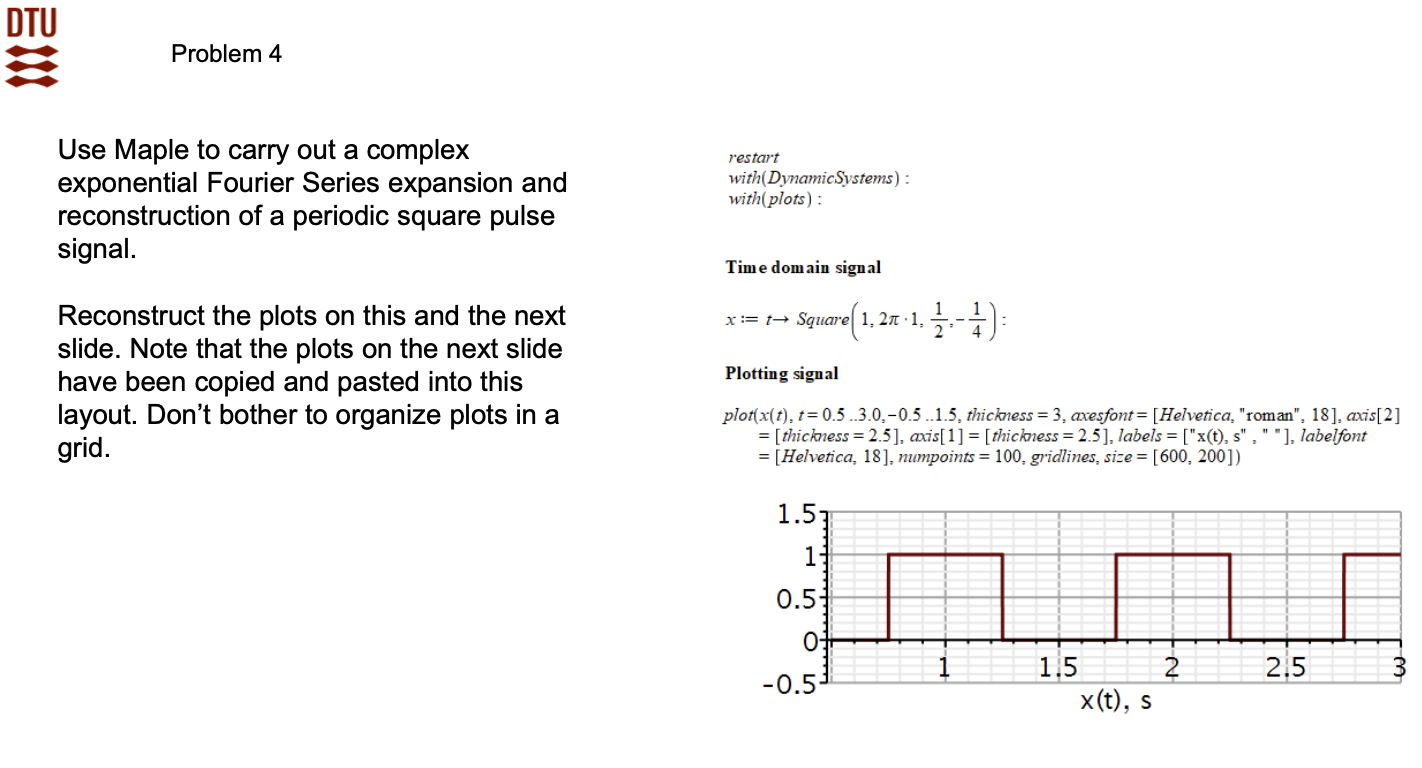

In [ ]:
# TODO : continue